<a href="https://colab.research.google.com/github/qreynas/sentiment_analysis/blob/main/01_Sentiment_Analysis_BCXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎯 Problema de Negocio
Enrique I. Reyna S.

Bootcap Xperience. El objetivo de este proyecto es analizar los sentimientos de los tweets, identificando si los mensajes son positivos o negativos.

## ❓ Preguntas Clave

- **¿Qué variables pueden ser clave para la detección del sentimiento?**
- **¿Qué tipo de modelos pueden servir para detectar el sentimiento en los tweets?**
- **¿Qué métricas se pueden utilizar para evaluar el desempeño del modelo?**

Este ejercicio esta basado en Sentiment140 Dataset. Es un un conjunto de datos de 1,600,000 tweets preprocesados, del cual se pretende generar diversas características que se utilizarán para entrenar un modelo de clasificación.

El conjunto de datos es una colección de 1,6 millones de tuits que **han sido etiquetados como positivos o negativos**.


*Pregunta de trabajo: ¿cómo consiguieron tantos tuits etiquetados?.* Documentación https://www.kaggle.com/datasets/kazanova/sentiment140

**Hipótesis de trabajo: asumimos que cualquier tuit con emoticones positivos, como :), era positivo, y los tuits con emoticones negativos, como :(, eran negativos.**

**Es bueno discutir eso más adelante, pero por ahora, simplemente limpiemos el asunto. En este cuaderno, eliminaremos las columnas que no queremos y estandarizaremos la columna de sentimiento.**



#Prep work

In [1]:
import pandas as pd

In [2]:
#Get data. Conect to google drive
df = pd.read_csv('/content/drive/MyDrive/2025/02 BCXP ML/01 Análisis de sentimientos/training_1600000_processed_noemoticon.csv', encoding='latin-1')

In [3]:
df.head(3)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire


In [4]:
df.sample(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
371715,0,2050501405,Fri Jun 05 18:46:58 PDT 2009,NO_QUERY,xheartscream,so freakin tireddd. i feel like im drunk.
996446,4,1835887900,Mon May 18 06:57:27 PDT 2009,NO_QUERY,PhilMcCheyne,@SarahWainwright hahah your so lame
841705,4,1563515133,Sun Apr 19 23:07:56 PDT 2009,NO_QUERY,RandiBeeman,@goldengateblond gimme the pink one if you don...
1548684,4,2183125284,Mon Jun 15 14:04:47 PDT 2009,NO_QUERY,paulmcalister,"@LiDLo new ugly betty looks good, never guesse..."
920728,4,1754044355,Sun May 10 04:43:20 PDT 2009,NO_QUERY,millyox,"@tommcfly Yes, life is good! Especially when ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

 ·The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment .
It contains the following 6 fields:

  1.**target:** the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

  2.**ids:** The id of the tweet ( 2087)

  3.**date:** the date of the tweet (Sat May 16 23:58:44 UTC 2009)

  4.**flag:** The query (lyx). If there is no query, then this
value is NO_QUERY.

  5.**user:** the user that tweeted (robotickilldozr)

In [6]:
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
#También puede renombrar las columnas de la siguiente forma en el mismo getdata
df = pd.read_csv('/content/drive/MyDrive/2025/02 BCXP ML/01 Análisis de sentimientos/training_1600000_processed_noemoticon.csv', encoding='latin-1',
                names=['polarity', 'id', 'date', 'query', 'user', 'text'])
df.head(3)

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...



### Tratamiento de Datos

Durante el preprocesamiento se realizan las siguientes operaciones clave:

- 🧹 **Eliminación de URLs, menciones y emojis**: Se remueven del texto ya que pueden agregar ruido al análisis.
- ❌ **Eliminación de signos de puntuación y caracteres especiales**: Para normalizar el texto antes de aplicar las transformaciones.
- 🔡 **Transformación a minúsculas**: Para evitar que las palabras en mayúsculas se traten como diferentes palabras.
- 🛠️ **Generación de características adicionales**: Se generan nuevas variables basadas en el texto, como longitud del tweet, conteo de stopwords, densidad de palabras en mayúsculas, entre otras.


In [8]:
# counting missing values in dataset. Conteo de valores nulos
df.isnull().sum()


,0
polarity,0
id,0
date,0
query,0
user,0
text,0


In [9]:
#Crear sample
df_nuevo = df.sample(n=10, random_state=42).reset_index(drop=True)
df_nuevo

,polarity,id,date,query,user,text
0,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
1,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
2,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
3,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
4,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem
5,0,2052380495,Sat Jun 06 00:32:16 PDT 2009,NO_QUERY,Yengching,Going to miss Pastor's sermon on Faith...
6,4,1983449090,Sun May 31 13:10:36 PDT 2009,NO_QUERY,jessig06,on lunch....dj should come eat with me
7,0,2245479748,Fri Jun 19 16:11:29 PDT 2009,NO_QUERY,felicityfuller,@piginthepoke oh why are you feeling like that?
8,0,1770705699,Mon May 11 22:01:32 PDT 2009,NO_QUERY,stephiiheyy,gahh noo!peyton needs to live!this is horrible
9,4,1970386589,Sat May 30 03:39:34 PDT 2009,NO_QUERY,wyndwitch,@mrstessyman thank you glad you like it! There...


In [10]:
# from google.colab import files

# df_nuevo.to_csv('nuevo_dataset.csv', index=False)
# files.download('nuevo_dataset.csv')

##Limpieza de datos

In [11]:
!pip install nltk

In [12]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = str(text).lower()

    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Eliminar menciones (@usuario)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)

    # Eliminar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Eliminar números
    text = re.sub(r'\d+', '', text)

    # Eliminar espacios múltiples
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Aplicar la limpieza al texto
df['clean_text'] = df['text'].apply(clean_text)

In [14]:
df.sample(5)

,polarity,id,date,query,user,text,clean_text
1579159,4,2189910585,Tue Jun 16 01:14:13 PDT 2009,NO_QUERY,xxadelxx,I'm uup..I don't really know what will I do to...,im uupi dont really know what will i do today ...
1283092,4,2001904418,Tue Jun 02 02:28:52 PDT 2009,NO_QUERY,dubplatez,@dnfisher good luck in the interview dude,good luck in the interview dude
1266794,4,1999727573,Mon Jun 01 20:42:56 PDT 2009,NO_QUERY,jessica_sargent,@katiesantry glad you had an awesome birthday,glad you had an awesome birthday
15454,0,1554157955,Sat Apr 18 16:13:39 PDT 2009,NO_QUERY,Ryan_ADT,@minastefan ahh. i hate when the power goes out.,ahh i hate when the power goes out
496885,0,2185708620,Mon Jun 15 17:47:18 PDT 2009,NO_QUERY,jul_maniscalco,Wants casey &amp; cappie to be together,wants casey amp cappie to be together


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   polarity    1600000 non-null  int64 
 1   id          1600000 non-null  int64 
 2   date        1600000 non-null  object
 3   query       1600000 non-null  object
 4   user        1600000 non-null  object
 5   text        1600000 non-null  object
 6   clean_text  1600000 non-null  object
dtypes: int64(2), object(5)
memory usage: 85.4+ MB


In [16]:
# #Este es otro codigo para limpiar texto pero NO ESTA ADECUADO NI PROBRADO
# #https://www.kaggle.com/code/youssefhatem1/twitter-sentiment-analysis-using-cnn-architectures
# # Define English stopwords
# en_stop = set(stopwords.words('english'))

# # Initialize the WordNet Lemmatizer
# lemmatizer = WordNetLemmatizer()
# # Define function to clean and preprocess text
# def process_text(document):
#     document = re.sub(r'\s+', ' ', document, flags=re.I)  # Remove extra white space from text
#     document = re.sub(r'\W', ' ', str(document))   # Remove all the special characters from text
#     document = re.sub(r'[^a-zA-Z\s]', '', document) # Remove any character that isn't alphabetical
#     document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)     # Remove all single characters from text
#     document = document.lower()    # Converting to Lowercase
#     # Word tokenization
#     tokens = document.split()
#     lemma_txt = [lemmatizer.lemmatize(word) for word in tokens]
#     lemma_no_stop_txt = [word for word in lemma_txt if word not in en_stop]
#     # Drop words
#     tokens = [word for word in lemma_no_stop_txt if len(word) > 3 and not word.isdigit()]
#     # Getting unique words
#     indices = np.unique(tokens, return_index=True)[1]
#     clean_txt = np.array(tokens)[np.sort(indices)].tolist()
#     return ' '.join(clean_txt)  # Return the cleaned text as a string

In [17]:
# # Generar características adicionales
# df['tweet_length'] = df['text'].str.len()
# df['word_count'] = df['clean_text'].str.split().str.len()
# df['uppercase_ratio'] = df['text'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if len(str(x)) > 0 else 0)

# # Contar stopwords
# stop_words = set(stopwords.words('english'))
# df['stopwords_count'] = df['clean_text'].apply(lambda x: len([word for word in str(x).split() if word in stop_words]))

# # Mostrar el resultado
# print(df[['text', 'clean_text', 'tweet_length', 'word_count', 'uppercase_ratio', 'stopwords_count']].head())

# # Guardar el dataset procesado
# df.to_csv('cleaned_dataset.csv', index=False)

In [18]:
#Contar stopwords
stop_words = set(stopwords.words('english'))
df['stopwords_count'] = df['clean_text'].apply(lambda x: len([word for word in str(x).split() if word in stop_words]))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   polarity         1600000 non-null  int64 
 1   id               1600000 non-null  int64 
 2   date             1600000 non-null  object
 3   query            1600000 non-null  object
 4   user             1600000 non-null  object
 5   text             1600000 non-null  object
 6   clean_text       1600000 non-null  object
 7   stopwords_count  1600000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 97.7+ MB


In [20]:
#Revisamos el resultados
print(df[['text', 'clean_text', 'tweet_length', 'word_count', 'uppercase_ratio', 'stopwords_count']].head(3))

KeyError: "['tweet_length', 'word_count', 'uppercase_ratio'] not in index"

In [ ]:
df

In [ ]:
# Descaragr el dataset limpio para pruebas externas
# df.to_csv('cleaned_dataset.csv', index=False)
# from google.colab import files
# files.download('cleaned_dataset.csv')

In [ ]:
# Crear un sample del dataset lipio de 400,000 registros para pruebas
# df_sample_cleaned = df.sample(n=400000, random_state=42).reset_index(drop=True)
# df_sample_cleaned.to_csv('sample_cleaned_dataset.csv', index=False)
# files.download('sample_cleaned_dataset.csv')

In [ ]:
# df_sample_cleaned.info()

#SEGUNDO EJERCICIO DE EDA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

In [5]:
# Descargar stopwords de NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 1.Carga de datos

In [6]:
# 1.GET DATA. Conect to google drive
df = pd.read_csv('/content/drive/MyDrive/2025/02 BCXP ML/01 Análisis de sentimientos/training_1600000_processed_noemoticon.csv', encoding='latin-1')

#2.Análisis exploratorio de datos (EDA):

##2.1 Exploraciòn inicial

```
# Tiene formato de código
```

EXPLORACIÓN INICIAL

The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment . It contains the following 6 fields:

1.target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

2.ids: The id of the tweet ( 2087)

3.date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

4.flag: The query (lyx). If there is no query, then this value is NO_QUERY.

5.user: the user that tweeted (robotickilldozr)

In [10]:
#Colocamos nombre a las columnas
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
print(df.head())

   target         ids                          date      flag           user  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew   


In [21]:
%%time
# Análisis exploratorio de datos (EDA)
print('\nCABECERA')
print(df.head())
print('********'*15)

print('\nTIPOS DE DATOS')
print(df.info())
print('********'*15)

print('\nESTADISTICA DESCRIPTIVA')
pd.set_option('display.float_format', '{:.0f}'.format)
# Resetear la opción de formato a la configuración por defecto (si deseas volver al comportamiento original más tarde)
print(df.describe())
# pd.reset_option('display.float_format')
print('********'*15)

print('\nVALORES NULOS')
print(df.isnull().sum())
print('********'*15)

print('\REGISTROS (FILAS) DUPLICADAS')
print(df.duplicated().sum())
filas_duplicadas = df[df.duplicated()]
print("\nFilas Duplicadas:")
print(filas_duplicadas.head())

print('\nVALORES DUPLICADOS EN COLUMNAS TEXT IDS Y DATE')
print(df.duplicated(subset=['text', 'ids', 'date']).sum())
print(filas_duplicadas.head())

print('\nVALORES DUPLICADOS EN COLUMNAS TEXT Y DATE')
print(df.duplicated(subset=['text', 'ids', 'date']).sum())
print(filas_duplicadas.head())
print('********'*15)

print('\nVALORES ÚNICOS o FRECUENCIA DE OCURRENCIA')
# valores_unicos = df['target'].unique()
# lista_unicos=valores_unicos.tolist()
# print(lista_unicos)
# print(valores_unicos)
print('********'*2)
print(df['target'].value_counts())
print('********'*2)
print(df['ids'].value_counts())
print('********'*2)
print(df['date'].value_counts())
print('********'*2)
print(df['user'].value_counts())
print('********'*2)
print(df['flag'].value_counts())
print('********'*2)
print(df['text'].value_counts())

print('\n\nProceso completado. Costo computacional/celda :')


CABECERA
   target         ids                          date      flag           user  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew   
************************************************************************************************************************

TIPOS DE DATOS
<class 'pandas.core.frame.DataFrame'>
Rang

Primeras impresiones del DataSet Sucio:
1. df esta balanceado
target
4    800000
0    799999

pero,
2. Hay Ids repetidos
3. Hay registro de usuarios repetidos
4. Hay fechas con tiempo exacto repetidas
5. Hay adenas de texto identicas repetidas veces

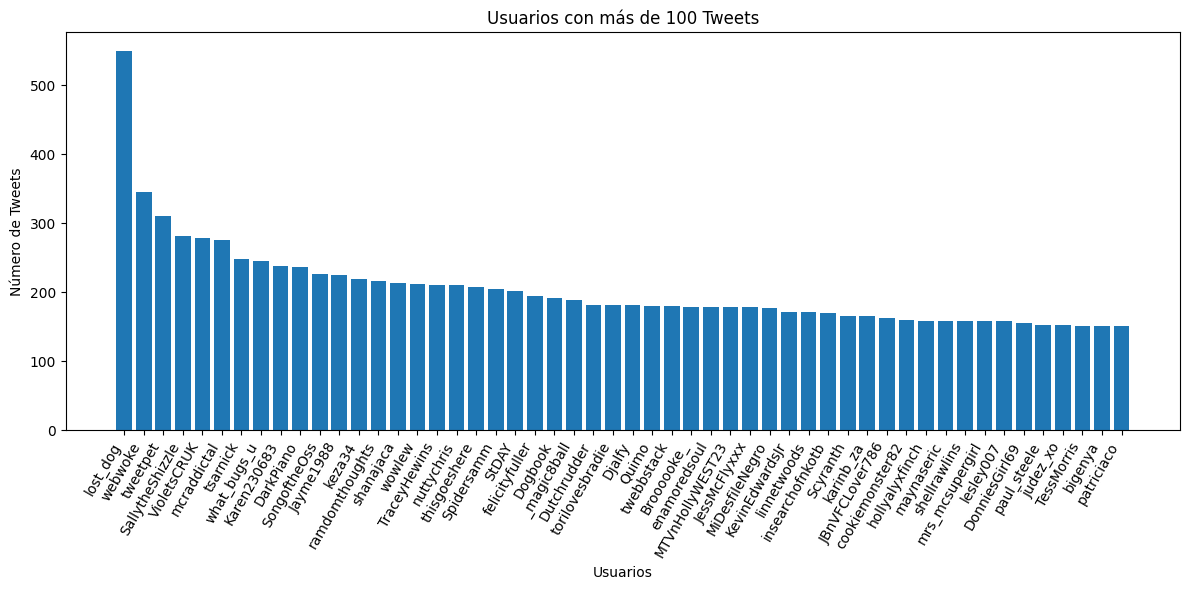

In [6]:
%%time
#Contabilizamos frecuencias de 'user'
user_counts = df['user'].value_counts()

# Filtrar user_counts para incluir solo usuarios con más de 100 tweets
user_counts_filtered = user_counts[user_counts > 150]

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura si es necesario
plt.bar(user_counts_filtered.index, user_counts_filtered.values)

# Personalizar la gráfica
plt.title('Usuarios con más de 100 Tweets')
plt.xlabel('Usuarios')
plt.ylabel('Número de Tweets')
plt.xticks(rotation=60, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad

# Mostrar la gráfica
plt.tight_layout()
plt.show()

print('\n\nProceso completado. Costo computacional/celda :')

<ipython-input-7-a5a7b9137d9a>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


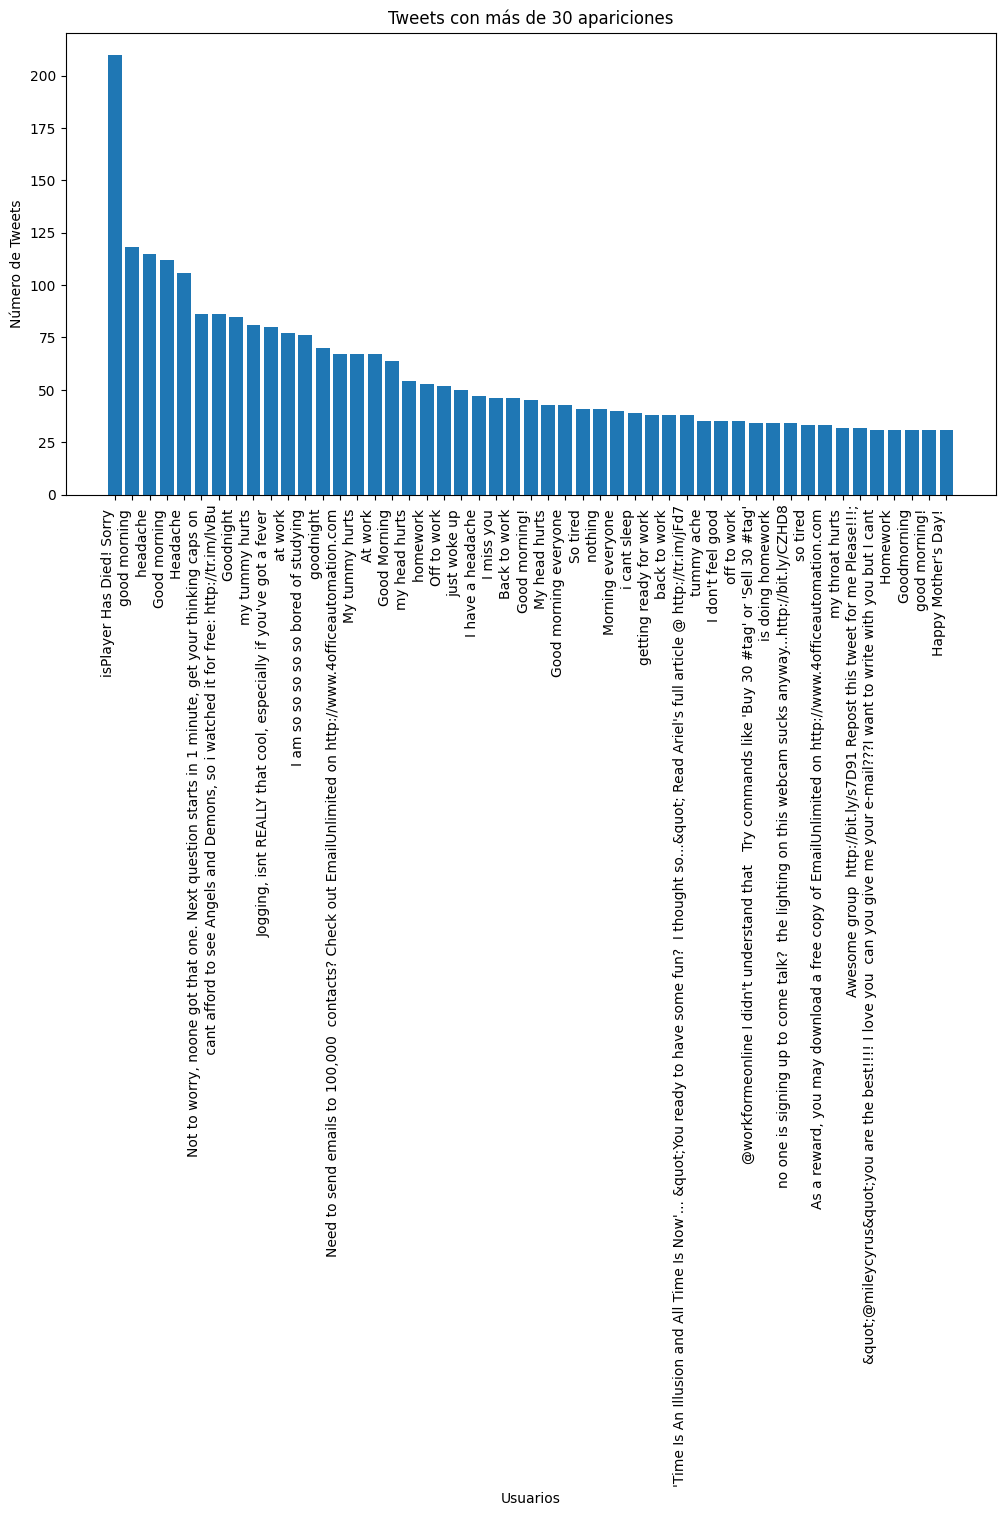

In [7]:
%%time
#Contabilizamos frecuencias de 'text'
text_counts = df['text'].value_counts()

# Filtrar text_counts para incluir solo usuarios con más de 100 tweets
user_counts_filtered = text_counts[text_counts > 30]

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura si es necesario
plt.bar(user_counts_filtered.index, user_counts_filtered.values)

# Personalizar la gráfica
plt.title('Tweets con más de 30 apariciones')
plt.xlabel('Usuarios')
plt.ylabel('Número de Tweets')
plt.xticks(rotation=90, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad

# Mostrar la gráfica
plt.tight_layout()
plt.show()

print('\n\nProceso completado. Costo computacional/celda :')

In [9]:
%%time
import pandas as pd

def listar_duplicados_user_text(df):

    # Crear una nueva columna que combine los valores de 'user' y 'text'
    df['user_text_combinado'] = df[['user', 'text']].apply(tuple, axis=1)

    # Contar la frecuencia de cada combinación de valores
    conteo_duplicados = df['user_text_combinado'].value_counts()

    # Filtrar solo las combinaciones que aparecen más de una vez
    duplicados = conteo_duplicados[conteo_duplicados > 1]

    # Obtener los índices de las filas duplicadas
    indices_duplicados = df[df['user_text_combinado'].isin(duplicados.index)].index.tolist()

    # Crear un DataFrame con los resultados
    resultados_df = pd.DataFrame({'user_text_combinado': duplicados.index, 'conteo': duplicados.values, 'indices_filas': [df[df['user_text_combinado'] == combinacion].index.tolist() for combinacion in duplicados.index]})

    # Eliminar la columna temporal 'user_text_combinado' del DataFrame original
    df.drop(columns=['user_text_combinado'], inplace=True)

    return resultados_df

# Ejemplo de uso con tu DataFrame 'df':
resultados_duplicados = listar_duplicados_user_text(df)

# Mostrar los resultados:
print("Duplicados de 'user' y 'text':")
print(resultados_duplicados)

print('\n\nProceso completado. Costo computacional/celda :')

Duplicados de 'user' y 'text':
                                    user_text_combinado  conteo  \
0                   (wowlew, isPlayer Has Died! Sorry )     210   
1     (TheAmazingCat,  cant afford to see Angels and...      86   
2     (chaosbot, Not to worry, noone got that one. N...      86   
3     (MarketingCat, Need to send emails to 100,000 ...      51   
4     (WallTweet, @workformeonline I didn't understa...      34   
...                                                 ...     ...   
3542  (FrankPatris, @joycerica i really want to but ...       2   
3543  (chars1983, trying really hard to stay calm to...       2   
3544  (lillekerohus, I'm so nervous about my guitar ...       2   
3545  (ifoxmedia, 3 things you can do to Get more Fo...       2   
3546  (iliekpanduz, Attempted to take a pick of phil...       2   

                                          indices_filas  
0     [99971, 100158, 100203, 100258, 102018, 102131...  
1     [104053, 104193, 104334, 104477, 104621, 1

## 2.2 Tratamiento a los datos

In [26]:
%%time
#Eliminamos valores nulos (que no hay) y duplicados de USER IDS Y TEXT
df_limpio_null_duplicates = df.dropna().drop_duplicates(subset=['user', 'ids', 'text'])
df_limpio_null_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1598314 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1598314 non-null  int64 
 1   ids     1598314 non-null  int64 
 2   date    1598314 non-null  object
 3   flag    1598314 non-null  object
 4   user    1598314 non-null  object
 5   text    1598314 non-null  object
dtypes: int64(2), object(4)
memory usage: 85.4+ MB
CPU times: user 2.5 s, sys: 113 ms, total: 2.62 s
Wall time: 2.68 s


In [27]:
%%time
#Elminamosla column flags, no poarta nada.
df_limpio = df_limpio_null_duplicates.drop(columns=['flag'])

CPU times: user 68.4 ms, sys: 5 µs, total: 68.4 ms
Wall time: 67.6 ms


In [30]:
%%time
#Reiniciamos indices (por salud mental e higiene en ciencia de datos)
df_limpio = df.reset_index(drop=True)
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
CPU times: user 401 ms, sys: 36.2 ms, total: 437 ms
Wall time: 474 ms


In [ ]:
# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = str(text).lower()

    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Eliminar menciones (@usuario)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)

    # Eliminar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Eliminar números
    text = re.sub(r'\d+', '', text)

    # Eliminar espacios múltiples
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Aplicar la limpieza al texto
df['clean_text'] = df['text'].apply(clean_text)

#3.Preprocesamiento de sentimientos

In [ ]:
# Resumen de los registros
print("Resumen de los registros")
print(df.describe())

In [ ]:
# Distribución de polaridad
plt.figure(figsize=(8, 6))
sns.countplot(x='polarity', data=df)
plt.title('Distribución de Polaridad')
plt.show()

In [ ]:
# Distribución de polaridad (usando 'target')
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df) # Changed 'polarity' to 'target'
plt.title('Distribución de Polaridad')
plt.show()

#4.Análisis de sentimientos

#5.Entrenamiento de Modelos

#6.Evaluación de modelo

#7.Visualización del modelo